In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # Chart Plotting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING DATASET**

In [70]:
data_set=pd.read_csv('/content/drive/My Drive/Colab-Notebooks/LSTM RISK/Fraud_Risk_Dataset.csv')

In [71]:
data_set.head(1000)

,Transaction ID,Amount,Transaction Type,Location,Time of Transaction,Account Age,Customer Segment,Risk Score,Outcome
0,TID000001,719.69,Online Purchase,Hamiltontown,7/25/2024 7:59,6.1,Retail,68,0
1,TID000002,4341.36,POS Purchase,Mariabury,8/4/2024 4:42,14.5,Business,75,1
2,TID000003,569.52,Online Purchase,Nicolemouth,6/12/2024 19:49,10.9,Business,76,1
3,TID000004,4429.59,Online Purchase,South Rebeccaville,8/17/2024 16:53,15.2,Business,66,0
4,TID000005,294.03,Online Purchase,Kevinport,4/11/2024 0:06,2.0,Corporate,47,0
...,...,...,...,...,...,...,...,...,...
995,TID000996,2944.10,ATM Withdrawal,New Jasonhaven,3/16/2024 17:40,3.4,Corporate,9,0
996,TID000997,711.27,Online Purchase,Kevinburgh,3/5/2024 15:03,5.4,Business,65,0
997,TID000998,493.01,ATM Withdrawal,Lake Lisa,6/9/2024 18:17,4.9,Retail,92,1
998,TID000999,3425.87,ATM Withdrawal,Kellychester,4/19/2024 16:26,12.6,Retail,85,1


In [72]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction ID       1000 non-null   object 
 1   Amount               1000 non-null   float64
 2   Transaction Type     1000 non-null   object 
 3   Location             1000 non-null   object 
 4   Time of Transaction  1000 non-null   object 
 5   Account Age          1000 non-null   float64
 6   Customer Segment     1000 non-null   object 
 7   Risk Score           1000 non-null   int64  
 8   Outcome              1000 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


In [73]:
data_set.shape

(1000, 9)

In [74]:
print ("Numbers of rows", data_set.shape[0])
print ("Numbers of columns", data_set.shape[1])

Numbers of rows 1000
Numbers of columns 9


In [75]:
data_set.describe()

,Amount,Account Age,Risk Score,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2472.978540,10.152600,51.059000,0.315000
std,1452.426729,5.467532,29.099421,0.464748
min,10.480000,0.500000,1.000000,0.000000
25%,1189.167500,5.775000,25.750000,0.000000
50%,2484.720000,10.000000,51.000000,0.000000
75%,3744.220000,14.800000,76.000000,1.000000
max,4994.940000,20.000000,100.000000,1.000000


In [76]:
data_set.describe().sum()

,0
Amount,17348.932769
Account Age,1066.695132
Risk Score,1333.908421
Outcome,1002.779748


**CHART FOR TARGET**

Text(0, 0.5, 'frequency')

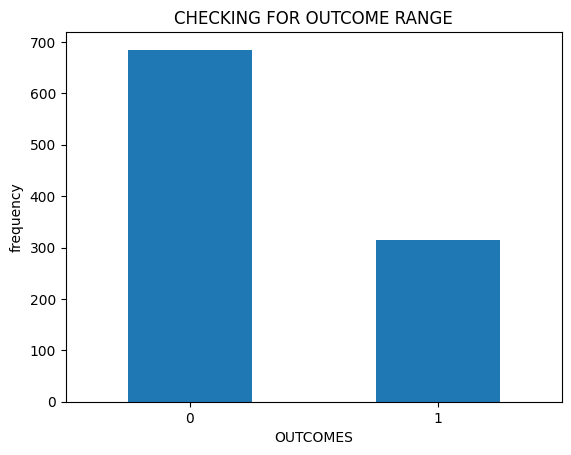

In [78]:
count_classes = pd.Series(data_set['Outcome']).value_counts()
count_classes.plot(kind='bar', rot=0)
plt.title("CHECKING FOR OUTCOME RANGE")
plt.xlabel("OUTCOMES")
plt.ylabel("frequency")

**DATA PREPROCESSING FOR MODEL TRAINING AND IMPLEMENTATION**

In [79]:
data_set.columns

Index(['Transaction ID', 'Amount', 'Transaction Type', 'Location',
       'Time of Transaction', 'Account Age', 'Customer Segment', 'Risk Score',
       'Outcome'],
      dtype='object')

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_set = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/LSTM RISK/Fraud_Risk_Dataset.csv')

# Delete the useless columns:
cols_to_drop = ['Transaction ID', 'Time of Transaction', 'Location']
data_set = data_set.drop(columns=cols_to_drop)

# Replace the value repeated if there is in the dataset: e.g.
columns = ["Transaction Type", "Customer Segment"]
for col in columns:
    data_set[col] = data_set[col].astype('category')
    data_set[col] = data_set[col].cat.codes

# Delete all the duplicated rows:
data_set.drop_duplicates(keep='last')

# Save the new datasets into a new csv file:
data_set.to_csv('/content/drive/My Drive/Colab-Notebooks/LSTM RISK/clean_data_cyberRisk_Dataset.csv')

In [105]:
# Take a look at the data after processing
data_sets = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/LSTM RISK/clean_data_cyberRisk_Dataset.csv')
data_sets.head(10)

,Unnamed: 0,Amount,Transaction Type,Account Age,Customer Segment,Risk Score,Outcome
0,0,719.69,2,6.1,2,68,0
1,1,4341.36,3,14.5,0,75,1
2,2,569.52,2,10.9,0,76,1
3,3,4429.59,2,15.2,0,66,0
4,4,294.03,2,2.0,1,47,0
5,5,4921.88,0,5.7,0,93,1
6,6,3106.44,0,1.3,1,42,0
7,7,1724.51,3,9.2,0,23,0
8,8,2075.56,1,6.8,1,100,1
9,9,2212.84,0,15.2,2,55,0


**CHEACKING THE DATASET CORRELATION**

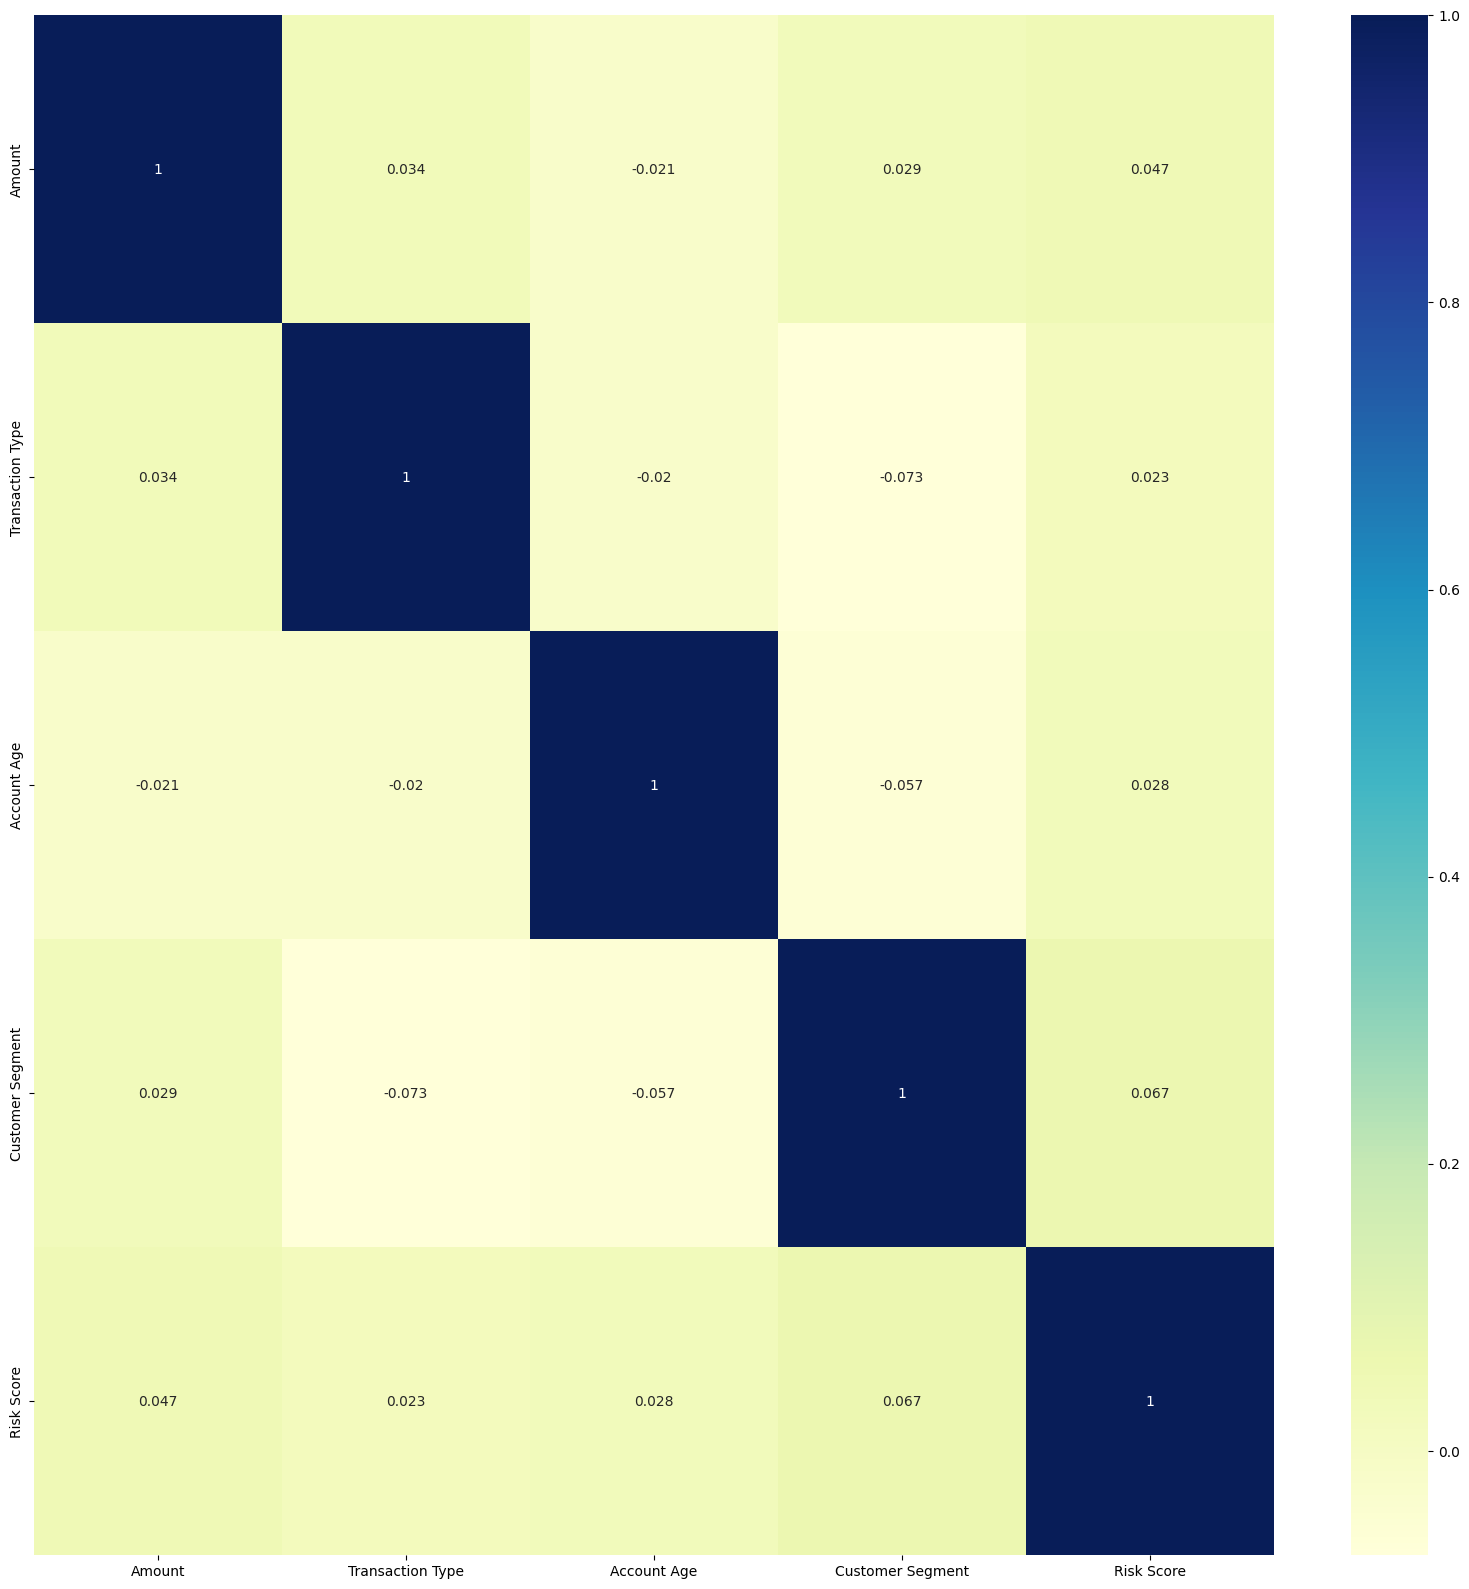

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_drop = ['Outcome']
data_set = data_set.drop(columns=cols_to_drop)

corrmat = data_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data_set[top_corr_features].corr(),annot=True,cmap="YlGnBu")
plt.show()

**VISULIZATION OF TEMPRETURE VS OUTCOME**

Columns in the dataset: ['Transaction ID', 'Amount', 'Transaction Type', 'Location', 'Time of Transaction', 'Account Age', 'Customer Segment', 'Risk Score', 'Outcome']


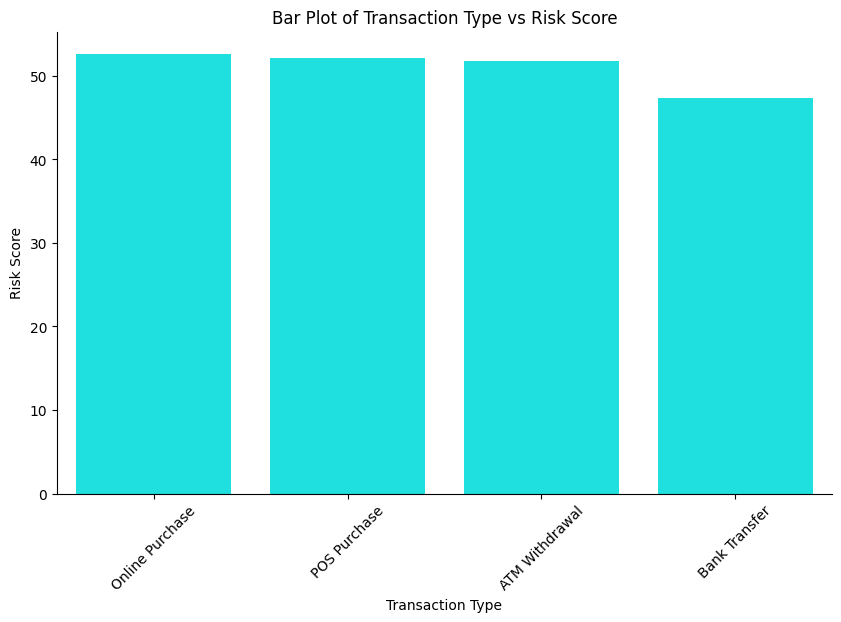

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data_set = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/LSTM RISK/Fraud_Risk_Dataset.csv')
data_set = data_set.loc[:, ~data_set.columns.str.contains('^Unnamed')]

# Print column names to choose columns for visualization
print("Columns in the dataset:", data_set.columns.tolist())


# Choose two columns to visualize
data_set = data_set.loc[:, ~data_set.columns.str.contains('^Unnamed')]

column_x = 'Transaction Type'  # Replace with your actual column name
column_y = 'Risk Score'  # Replace with your actual column name

# Check if the chosen columns exist
if column_x in data_set.columns and column_y in data_set.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.plot(kind='bar', rot=0)
    sns.barplot(data=data_set, x=column_x, y=column_y, errorbar=None, color='cyan')

    # Add title and labels
    plt.title(f'Bar Plot of {column_x} vs {column_y}')
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.xticks(rotation=45)
    sns.despine(top=True)
    plt.show()
else:
    print(f"One or both columns '{column_x}' and '{column_y}' do not exist in the dataset.")

**CREATION OF LONG SHORT TERM MEMORY (LSTM) MODEL**

pip install imbalanced-learn tensorflow

In [108]:
data_set = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/LSTM RISK/clean_data_cyberRisk_Dataset.csv')
data_set.head()

,Unnamed: 0,Amount,Transaction Type,Account Age,Customer Segment,Risk Score,Outcome
0,0,719.69,2,6.1,2,68,0
1,1,4341.36,3,14.5,0,75,1
2,2,569.52,2,10.9,0,76,1
3,3,4429.59,2,15.2,0,66,0
4,4,294.03,2,2.0,1,47,0


Number of classes: 2
Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5908 - loss: 0.6867 - val_accuracy: 0.0000e+00 - val_loss: 0.7190
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6361 - loss: 0.6419 - val_accuracy: 0.5500 - val_loss: 0.6958
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8290 - loss: 0.5101 - val_accuracy: 0.9409 - val_loss: 0.5192
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9651 - loss: 0.2817 - val_accuracy: 1.0000 - val_loss: 0.2058
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9643 - loss: 0.1438 - val_accuracy: 1.0000 - val_loss: 0.0902
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9881 - loss: 0.0838 - val_accuracy: 1.0000 - val_loss: 0.0520
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9843 - loss: 0.0588 - val_accuracy: 1.0000 - val_loss: 0.0481
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9767 - loss: 0.0595 

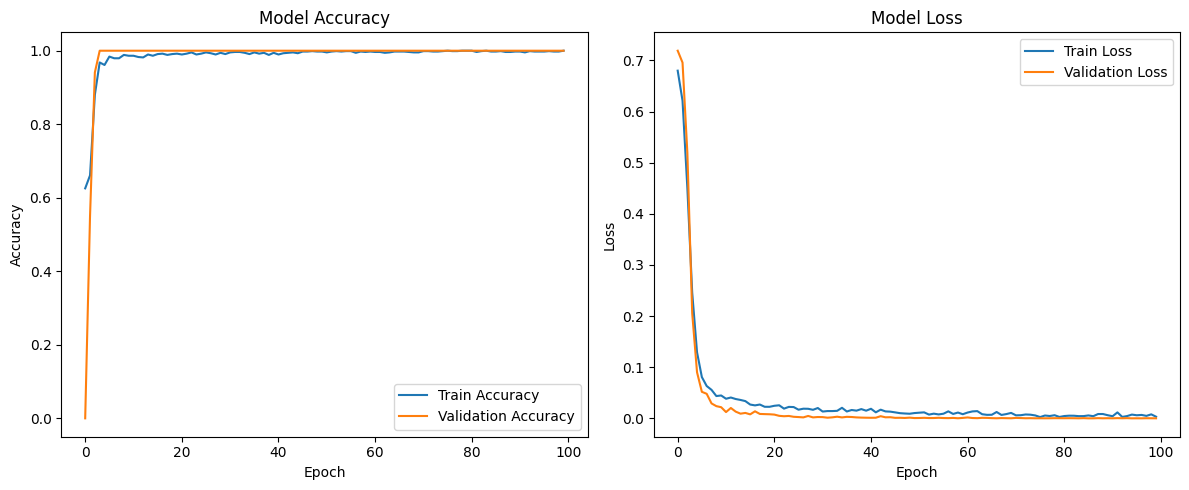

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step

Test Performance:
Accuracy: 0.99
F1 Score: 0.9899555867227676
Precision: 0.9901438848920863
Recall: 0.99


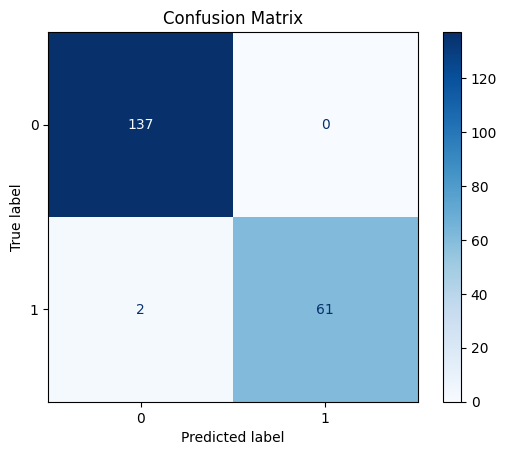

In [118]:
# ==================== Libraries ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras import layers
import warnings
import absl.logging

# Silence TensorFlow absl warnings
absl.logging.set_verbosity(absl.logging.ERROR)

# Silence sklearn "feature names" warning
warnings.filterwarnings("ignore", category=UserWarning)

# ==================== Load dataset ====================
data_set = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/LSTM RISK/clean_data_cyberRisk_Dataset.csv')
data_set.fillna(data_set.mean(), inplace=True)

# ==================== Features and target ====================
X = data_set.drop('Outcome', axis=1)
y = data_set['Outcome']

# Encode labels if they are not numeric
if y.dtype == 'object':
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

num_classes = len(np.unique(y))
print("Number of classes:", num_classes)

# ==================== Train-test split ====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==================== Apply SMOTE ====================
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ==================== Feature Scaling ====================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ==================== Reshape for LSTM ====================
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ==================== Build LSTM Model ====================
model = keras.Sequential()
model.add(layers.LSTM(128, activation='relu', return_sequences=True,
                      input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(layers.Dropout(0.4))
model.add(layers.LSTM(64, activation='relu'))

if num_classes == 2:
    # Binary classification
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
else:
    # Multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# ==================== Train Model ====================
history = model.fit(
    X_train_lstm,
    y_train_resampled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ==================== Plot Training History ====================
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# ==================== Predictions ====================
y_pred_prob = model.predict(X_test_lstm)

if num_classes == 2:
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
else:
    y_pred = np.argmax(y_pred_prob, axis=1)

# ==================== Evaluation ====================
print("\nTest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# ==================== Confusion Matrix ====================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

**SAVE THE LSTM SCALER AND TRAINED MODEL FOR FUTURE USE**

In [119]:
# ==================== Save Model ====================
import joblib
import warnings
import absl.logging

# Silence TensorFlow absl warnings
absl.logging.set_verbosity(absl.logging.ERROR)

# Silence sklearn "feature names" warning (optional, better to fix with DataFrame)
warnings.filterwarnings("ignore", category=UserWarning)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Save in HDF5 format
model.save('/content/drive/My Drive/Colab-Notebooks/LSTM RISK/LSTM_binaryClass_model.h5')
print("Model.h5 saved successfully!")
# Or save in TensorFlow SavedModel format
#model.save("lstm_multiclass_model")

# Save scaler for later use
joblib.dump(scaler, '/content/drive/My Drive/Colab-Notebooks/LSTM RISK/scaler.pkl')
print("Scaler saved as scaler.pkl")

Model.h5 saved successfully!
Scaler saved as scaler.pkl


**MAKE PREDICTIONS**

In [121]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import joblib  # for saving/loading scaler
import warnings
import absl.logging

# Silence TensorFlow absl warnings
absl.logging.set_verbosity(absl.logging.ERROR)

# Silence sklearn "feature names" warning (optional, better to fix with DataFrame)
warnings.filterwarnings("ignore", category=UserWarning)

# ==================== Load Model & Scaler ====================
model = load_model('/content/drive/My Drive/Colab-Notebooks/LSTM RISK/LSTM_binaryClass_model.h5')
scaler = joblib.load('/content/drive/My Drive/Colab-Notebooks/LSTM RISK/scaler.pkl')   # saved during training

# ==================== Insert Manual Row Data====================
feature_names = ["Amount","Transaction Type", "Account Age", "Customer Segment", "Risk Score"]
manual_row = [0,	719.69,	2,	6.1,	2,	68]  # Example row



# Convert to numpy array
manual_row = np.array(manual_row).reshape(1, -1)

# Scale using saved scaler
manual_row_scaled = scaler.transform(manual_row)

# Reshape for LSTM (timesteps=1, features=n)
manual_row_lstm = manual_row_scaled.reshape((1, 1, manual_row_scaled.shape[1]))

# ==================== Predict ====================
prediction_prob = model.predict(manual_row_lstm)

# Convert to percentage
prediction_percent = (prediction_prob * 100).round(2)

# Force numpy to always show 2 decimals, no scientific notation
np.set_printoptions(suppress=True, formatter={'float_kind':lambda x: f"{x:.2f}"})

# Get predicted class
predicted_class = np.argmax(prediction_prob, axis=1)[0]

# Define class labels
class_labels = {0: "Non Risk", 1: "Risk"}

# ==================== Print Results in BOLD====================
print("Prediction probabilities (%):", prediction_percent)
predicted_label = class_labels.get(predicted_class, "Unknown")
print(f"Predicted class: \033[1m{predicted_label}\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Prediction probabilities (%): [[0.11]]
Predicted class: Non Risk


# full_lstm_tabular_pipeline.py
# Single-file pipeline: preprocess -> SMOTE -> LSTM -> evaluate -> save

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
import absl.logging
import os

# ---------- silence noisy warnings ----------
absl.logging.set_verbosity(absl.logging.ERROR)
warnings.filterwarnings("ignore", category=UserWarning)

# ---------- Config ----------
CSV_PATH = "/content/drive/My Drive/Colab-Notebooks/LSTM RISK/clean_data_cyberRisk_Dataset.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.20
VALIDATION_SPLIT = 0.2           # inside model.fit (for training -> train/val)
SMOTE_K_NEIGHBORS = 2
EPOCHS = 100
BATCH_SIZE = 32
PATIENCE_ES = 8                  # early stopping patience
PATIENCE_RLR = 4                 # reduce lr patience
DROP_COLS = ['Amount','Account Age']                   # e.g. ['Amount','Account Age'] if you want to exclude them from features
MODEL_SAVE_PATH = "/content/drive/My Drive/Colab-Notebooks/LSTM RISK/lstm_tabular_model.h5"

# ---------- Load dataset ----------
df = pd.read_csv(CSV_PATH)
df = df.copy()
df.fillna(df.mean(), inplace=True)
# remove Unnamed columns (if any)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# ---------- Inspect / sanity ----------
print("Dataset shape:", df.shape)
print("Columns:", list(df.columns))

# ---------- Features and target ----------
TARGET_COL = "Outcome"
if TARGET_COL not in df.columns:
    raise ValueError(f"Target column '{TARGET_COL}' not found in CSV.")

# optionally drop columns you don't want as features
features = df.drop(columns=[TARGET_COL] + DROP_COLS, errors='ignore')
labels = df[TARGET_COL].copy()

# if labels are string, encode
if labels.dtype == 'object':
    le = LabelEncoder()
    labels = le.fit_transform(labels)

# ensure labels are integer 0/1 or multiclass integers
labels = labels.astype(int)
num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)

# ---------- Train/Test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    features, labels,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=labels
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ---------- Apply SMOTE on training only ----------
if len(np.unique(y_train)) == 2:
    smote = SMOTE(random_state=RANDOM_STATE, k_neighbors=SMOTE_K_NEIGHBORS)
else:
    smote = SMOTE(random_state=RANDOM_STATE, k_neighbors=SMOTE_K_NEIGHBORS)  # works for >2 as well but be cautious

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE, train shape:", X_train_res.shape, "Labels distribution:", np.bincount(y_train_res))

# ---------- Scaling ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# ---------- Reshape for LSTM ----------
# We treat each sample as a sequence of length=1 with n_features features
timesteps = 1
n_features = X_train_scaled.shape[1]

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

print("LSTM input shape:", X_train_lstm.shape)

# ---------- Build LSTM model (binary or multi) ----------
def build_lstm_model(timesteps, n_features, num_classes):
    inp = layers.Input(shape=(timesteps, n_features))
    x = layers.LSTM(64, return_sequences=False)(inp)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    if num_classes == 2:
        out = layers.Dense(1, activation='sigmoid')(x)
        model = keras.Model(inputs=inp, outputs=out)
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
    else:
        out = layers.Dense(num_classes, activation='softmax')(x)
        model = keras.Model(inputs=inp, outputs=out)
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

model = build_lstm_model(timesteps, n_features, num_classes)
model.summary()

# ---------- Callbacks ----------
early_stop = EarlyStopping(monitor='val_loss', patience=PATIENCE_ES, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=PATIENCE_RLR, verbose=1, min_lr=1e-6)

# ---------- Train ----------
history = model.fit(
    X_train_lstm,
    y_train_res,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ---------- Save model & scaler ----------
model.save(MODEL_SAVE_PATH)
pd.to_pickle(scaler, "/content/drive/My Drive/Colab-Notebooks/LSTM RISK/scaler.pkl")
print(f"Saved model to {MODEL_SAVE_PATH} and scaler to scaler.pkl")

# ---------- Plot training history ----------
plt.figure(figsize=(12,5))
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history.get('accuracy', []), label='train_acc')
plt.plot(history.history.get('val_accuracy', []), label='val_acc')
plt.title('Accuracy')
plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.legend()
# Loss
plt.subplot(1,2,2)
plt.plot(history.history.get('loss', []), label='train_loss')
plt.plot(history.history.get('val_loss', []), label='val_loss')
plt.title('Loss')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.legend()
plt.tight_layout()
plt.savefig("training_history.png")
plt.show()

# ---------- Predictions ----------
y_pred_prob = model.predict(X_test_lstm)
if num_classes == 2:
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
else:
    y_pred = np.argmax(y_pred_prob, axis=1)

# ---------- Evaluation ----------
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("\nTest Performance:")
print(f"Accuracy : {acc:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

# ---------- Example: predict single sample ----------
# Use the last row of the original dataset as demo (adjust as needed)
example_row = features.iloc[[-1]]   # keep as DataFrame
example_scaled = scaler.transform(example_row.values).reshape(1, timesteps, n_features)
prob = model.predict(example_scaled)[0]
if num_classes == 2:
    print("\nExample sample probability of class=1 (threat):", float(prob[0]) if prob.shape==(1,) or prob.shape==(1,1) else float(prob))
    print("Predicted class:", int(prob > 0.5))
else:
    print("\nExample class probabilities:", prob)
    print("Predicted class:", int(np.argmax(prob)))

print("\nDone.")